In [27]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.spatial.distance import cityblock
from scipy.special import softmax

In [28]:
def get_data_tsp():
    data = pd.read_csv("datasets/tsp.csv").values
    return data[:, 1:]

In [29]:
def f(arr):
    s = 0;
    for i in range(len(arr) - 1):
        s+=cityblock(arr[i], arr[i + 1])
    return s

In [30]:
def plot(arr):
    path = []
    for i in range(2 * len(arr) - 1):
        path.append([arr[i // 2][0], arr[i // 2 + i % 2][1]])
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])
    plt.scatter(arr[:, 0], arr[:, 1])
    plt.show()

In [31]:
def simulated_annealing(points):
    maxt = 1000
    mint = 0.001
    path_global = []
    for i in range(len(points)):
        path_global.append(points[i])
    path_global = np.array(path_global)
    min_len_global = f(path_global)
    np.random.shuffle(path_global)    
    for it in range(1000):
        j = int(np.random.uniform(0, len(points)))
        path = []
        for i in range(points.shape[0]):
            if i == j:
                continue
            cur = []
            for k in range(len(path_global)):
                cur.append(path_global[k])
            cur = np.array(cur)
            cur[[j, i]] = cur[[i, j]]
            path.append(cur)
        t = maxt - (maxt - mint) * it / 1000
        d = np.array([(min_len_global - f(path[i])) for i in range(len(path))])
        path_global = path[np.random.choice(len(path), p=softmax(d / t))]
        min_len_global = f(path_global)
           
    return path_global, min_len_global
    

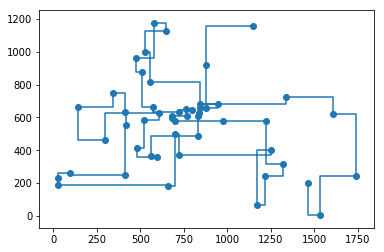

12105


In [33]:
points = get_data_tsp()
path, length= simulated_annealing(points)
plot(path)
print(length)